# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Data Viz - Project 1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Print out the number of rows and columns in the dataframe
print("# of rows = " + str(df.shape[0]) + ", # of columns = " + str(df.shape[1]))



# of rows = 1898, # of columns = 9


#### Observations: The dataframe contains 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


None

#### Observations: the dataset contains four integer columns, one decimal/float column and four object columns. One item that will need to be looked into is whether the change the data types of one or more of the object columns (i.e rating, restaurant_name).


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
import re
from pdb import line_prefix
from IPython.display import display

print('\n\n - MISSING OR BAD DATA -------------------')

print("\n\n-Describe the data------------------------")
display(df.describe(include='all').T)

print('\n-Get isnull sums------------------------' )
display('order_id : ' + str(df['order_id'].isnull().sum()))
display('customer_id : ' + str(df['customer_id'].isnull().sum()))
display('restaurant_name : ' + str(df['restaurant_name'].isnull().sum()))
display('cuisine_type : ' + str(df['cuisine_type'].isnull().sum()))
display('cost_of_the_order : ' + str(df['cost_of_the_order'].isnull().sum()))
display('day_of_the_week : ' + str(df['day_of_the_week'].isnull().sum()))
display('rating : '+ str(df['rating'].isnull().sum()))
display('food_preparation_time : ' + str(df['food_preparation_time'].isnull().sum()))
display('delivery_time : ' + str(df['delivery_time'].isnull().sum()))

print('\n-Get unique values with # of occurances--------------------')
display(df.value_counts())

print("\n-In more detail, look at restaurant_name column's------------------------")
display(df['restaurant_name'].describe())
display(df['restaurant_name'].unique())
display(df['restaurant_name'].value_counts())
#looks to be some garbage data, how many
# Use a valid escape sequence for the backslash character
pattern = re.compile(r'\\x')

# Check if the pattern matches any element in the 'restaurant_name' column
matches = df['restaurant_name'].str.contains(pattern, na=False)

# Display the number of matches
print(f"Number of matches: {matches.sum()}")

# Display the first 5 matching elements
display(df['restaurant_name'][matches].head())


print("\n-In more detail, look at cussine_type column's------------------------")
display(df['cuisine_type'].describe())
display(df['cuisine_type'].unique())
display(df['cuisine_type'].value_counts())

print("\n-In more detail, look at day_of_the_week column's------------------------")
display(df['day_of_the_week'].describe())
display(df['day_of_the_week'].unique())
display(df['day_of_the_week'].value_counts())

print("\n-In more detail, look at cost_of_the_order column's------------------------")
display(df['cost_of_the_order'].describe())
display(df['cost_of_the_order'].unique())
display(df['cost_of_the_order'].value_counts())

print("\n-In more detail, look at food_preparation_time column's------------------------")
display(df['food_preparation_time'].describe())
display(df['food_preparation_time'].unique())
display(df['food_preparation_time'].value_counts())

print("\n-In more detail, look at delivery_time column's------------------------")
display(df['delivery_time'].describe())
display(df['delivery_time'].unique())
display(df['delivery_time'].value_counts())

print("\n-In more detail, look at rating column's------------------------")
display(df['rating'].describe())
display(df['rating'].unique())
display(df['rating'].value_counts())
# Calculate the percentage of rows where the rating is "Not given"
total_rows = df.shape[0]
not_given_count = df[df['rating'] == "Not given"].shape[0]
percentage_not_given = (not_given_count / total_rows) * 100
print(f"\n Percentage of total rows that have a rating of ''Not given'': {percentage_not_given}");











 - MISSING OR BAD DATA -------------------


-Describe the data------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0



-Get isnull sums------------------------


'order_id : 0'

'customer_id : 0'

'restaurant_name : 0'

'cuisine_type : 0'

'cost_of_the_order : 0'

'day_of_the_week : 0'

'rating : 0'

'food_preparation_time : 0'

'delivery_time : 0'


-Get unique values with # of occurances--------------------


order_id  customer_id  restaurant_name            cuisine_type  cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476547   83095        Bareburger                 American      6.84               Weekend          5          22                     24               1
1477807   38050        Blue Ribbon Sushi          Japanese      12.71              Weekday          Not given  24                     28               1
1477819   35309        Blue Ribbon Sushi          Japanese      25.22              Weekday          Not given  31                     24               1
1477818   144352       Shake Shack                American      22.36              Weekend          4          27                     27               1
1477817   335897       Sushi of Gari 46           Japanese      12.18              Weekday          4          24                     27               1
                                                                                       


-In more detail, look at restaurant_name column's------------------------


count            1898
unique            178
top       Shake Shack
freq              219
Name: restaurant_name, dtype: object

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

Number of matches: 0


Series([], Name: restaurant_name, dtype: object)


-In more detail, look at cussine_type column's------------------------


count         1898
unique          14
top       American
freq           584
Name: cuisine_type, dtype: object

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


-In more detail, look at day_of_the_week column's------------------------


count        1898
unique          2
top       Weekend
freq         1351
Name: day_of_the_week, dtype: object

array(['Weekend', 'Weekday'], dtype=object)

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


-In more detail, look at cost_of_the_order column's------------------------


count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

array([30.75, 12.08, 12.23, 29.2 , 11.59, 25.22,  6.07,  5.97, 16.44,
        7.18,  5.92,  8.1 , 24.3 , 11.3 , 12.13, 16.2 , 16.98, 33.03,
       14.12, 24.2 , 15.91, 29.1 ,  8.92, 15.86, 21.88, 14.02,  9.17,
       12.18, 31.33, 29.05,  8.39,  9.12, 15.47, 16.01, 29.83, 19.89,
       19.35, 33.22, 24.25, 22.75,  6.74, 13.78, 16.93, 29.39, 20.23,
       14.6 ,  6.79, 31.38,  8.34, 12.46, 14.55, 32.93,  8.  , 13.05,
        5.67, 29.29, 16.15, 13.34,  9.75,  6.69,  4.75, 12.56, 21.2 ,
       19.31, 16.3 , 25.27, 14.79,  5.72,  9.22, 16.39, 17.03, 21.83,
       31.29, 11.83, 22.26, 20.47, 15.81, 22.36,  8.68, 12.9 , 29.15,
        7.86, 16.1 , 12.95, 11.69, 12.32, 14.99, 10.38,  9.65,  5.77,
        9.56, 29.34, 11.16, 14.07, 22.8 , 15.23, 16.49,  8.83, 16.25,
       16.83, 10.24, 19.4 , 13.97, 13.  ,  8.49, 20.18, 19.59, 16.11,
       12.27, 13.39,  9.02, 15.33, 31.43, 29.35, 15.28,  9.6 ,  8.88,
       15.96,  8.05,  8.54,  7.23, 19.69,  9.27,  8.97, 11.64, 13.15,
        9.41,  9.07,

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: cost_of_the_order, Length: 312, dtype: int64


-In more detail, look at food_preparation_time column's------------------------


count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

array([25, 23, 20, 28, 33, 21, 29, 34, 24, 30, 35, 32, 31, 27, 22, 26])

21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64


-In more detail, look at delivery_time column's------------------------


count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

array([20, 23, 28, 15, 24, 21, 30, 26, 22, 17, 25, 16, 29, 27, 18, 31, 32,
       19, 33])

24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: delivery_time, dtype: int64


-In more detail, look at rating column's------------------------


count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

array(['Not given', '5', '3', '4'], dtype=object)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


 Percentage of total rows that have a rating of ''Not given'': 38.77766069546891


Observations: Missing/Bad Data
1. No columns have null data issues
2. restaurant_name has some bad hex characters, these should not affect the analysis given the name is in tact.
3. Rating column has 39% of rows with "Not Given" entries. Additional analysis is needed on the "Not Given" fields (i.e. only tied to one customer or resaurant or ??? - since this is not null, will assume this data does not need to be imputed.

In [9]:
# Additional analysis on "Not Given" rating occurances.
# Get counts

# Filter the dataset for entries where the rating is "Not given"
not_given_ratings = df[df['rating'] == 'Not given']

# Count how many times each restaurant name appears in the filtered dataset
item_counts = not_given_ratings['restaurant_name'].value_counts()

# Display the sum of occurrences for each restaurant with a "Not given" rating
print(f"\nNot given ratings by restaurant: {item_counts}");

# Now do the same with customer
# Count how many times each restaurant name appears in the filtered dataset
item_counts = not_given_ratings['customer_id'].value_counts()

# Display the sum of occurrences for each restaurant with a "Not given" rating
print(f"\nNot given ratings by customer id: {item_counts}");

# Now let's look at this against total time (food_prep+delivery)
# Categorize the cost of the orders into $5 intervals
# Filter the DataFrame for orders where the rating is "Not given"

df['total_time'] = 0  # Initialize a new column to zero

# Calculate the total time for rows where rating is "Not given"
df.loc[df['rating'] == "Not given", 'total_time'] = df.loc[df['rating'] == "Not given", 'food_preparation_time'] + df.loc[df['rating'] == "Not given", 'delivery_time']

# Now, we only want to consider rows where 'total_time' is not zero for our distribution, indicating a rating of "Not given"
df_filtered = df[df['total_time'] != 0]

# Generate the distribution of total time in 5-minute increments
distribution = df_filtered['total_time'].value_counts(bins=pd.interval_range(start=0, end=df_filtered['total_time'].max(), freq=5, closed='left')).sort_index()

print(f"\nNot given ratings by total elapsed time: {distribution}");



Not given ratings by restaurant: Shake Shack                    86
The Meatball Shop              48
Blue Ribbon Sushi              46
Blue Ribbon Fried Chicken      32
Parm                           29
                               ..
The Loop                        1
Schnipper's Quality Kitchen     1
Go! Go! Curry!                  1
Market Table                    1
Amy Ruth's                      1
Name: restaurant_name, Length: 134, dtype: int64

Not given ratings by customer id: 52832     6
83287     5
97079     4
47440     3
186473    3
         ..
58231     1
38116     1
304509    1
41136     1
35309     1
Name: customer_id, Length: 599, dtype: int64

Not given ratings by total elapsed time: [0, 5)        0
[5, 10)       0
[10, 15)      0
[15, 20)      0
[20, 25)      0
[25, 30)      0
[30, 35)      0
[35, 40)     38
[40, 45)     79
[45, 50)    166
[50, 55)    194
[55, 60)    160
[60, 65)     87
Name: total_time, dtype: int64


Observations: rating == "Not given" occurances
1. The percentage of ratings == "Not given" being 39% while this is high, again, we will assume this data does not need to be imputed.
2. After looking at the occurances of "Not given" rating against restaurant, customer and total elapsed time, there is no single area that jumps out as being the prime driver for this data if we were to impute it.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
total_time,1898.0,NaN,NaN,NaN,19.982613,25.48381,0.0,0.0,0.0,49.0,68.0


#### Observations:

Based on the above summary, the foold preparation time (only) is:


1.   minimium = 20.0 min
2.   average (mean) = 27.4 min
3. maximum = 35.0 min






### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Calculate the total number of orders where rating == "Not given"

print("\n-In more detail, look at rating column's------------------------")
display(df['rating'].describe())
display(df['rating'].unique())
display(df['rating'].value_counts())
# Calculate the percentage of rows where the rating is "Not given"
total_rows = df.shape[0]
not_given_count = df[df['rating'] == "Not given"].shape[0]
percentage_not_given = (not_given_count / total_rows) * 100
print(f"\n Percentage of total rows that have a rating of ''Not given'': {percentage_not_given}");


-In more detail, look at rating column's------------------------


count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

array(['Not given', '5', '3', '4'], dtype=object)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


 Percentage of total rows that have a rating of ''Not given'': 38.77766069546891


#### Observations:
Out of a total number of orders of 1898, there are 736 orders that have a rating of "Not given" which is 38.8% of the total orders.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Number of duplicate order_ids: 0
Number of unique customers: 1200 out of 1898 total customer-orders


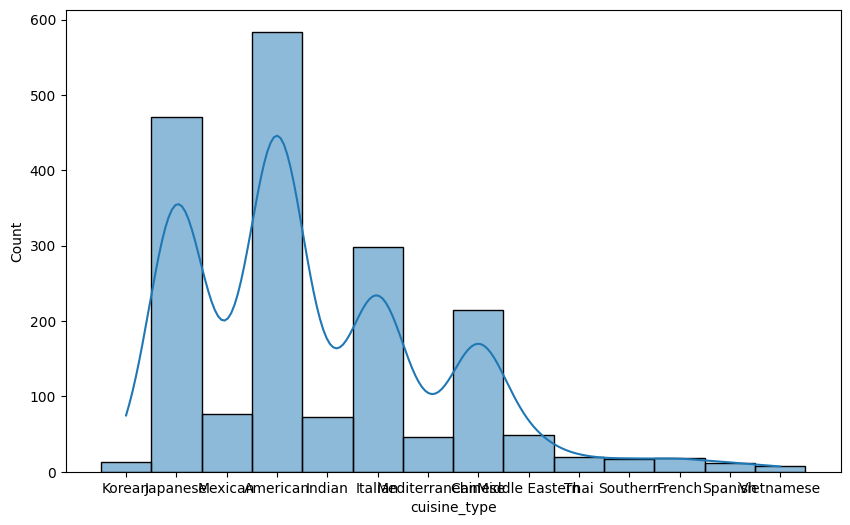

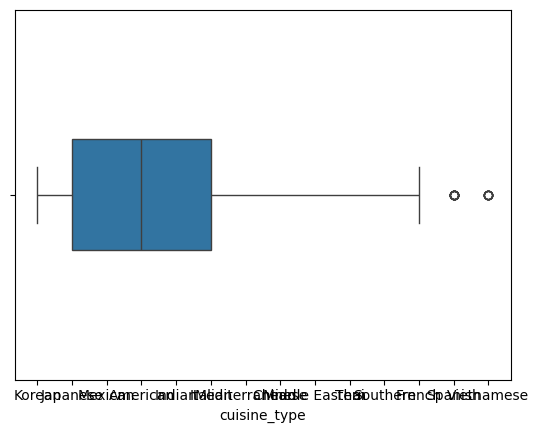

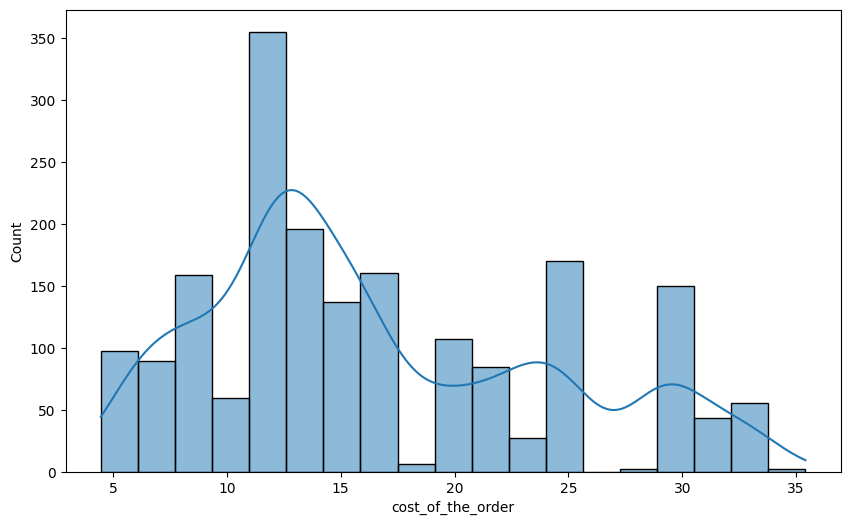

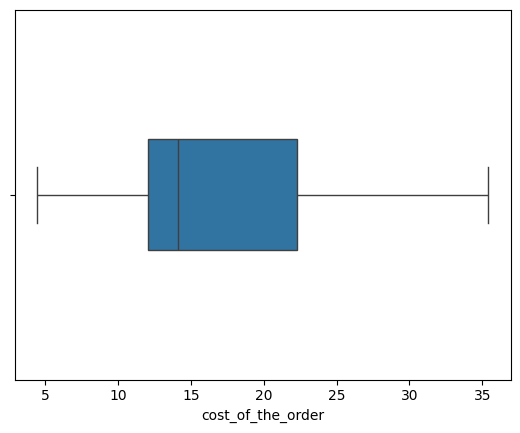

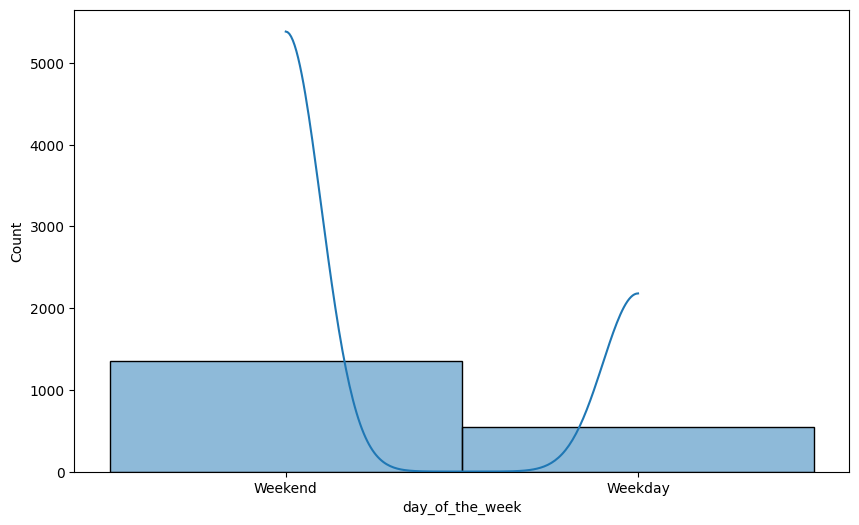

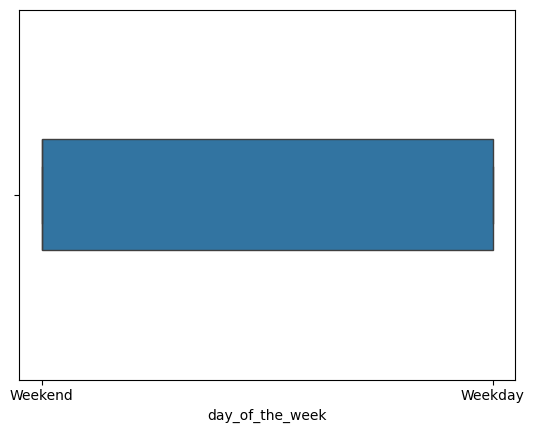

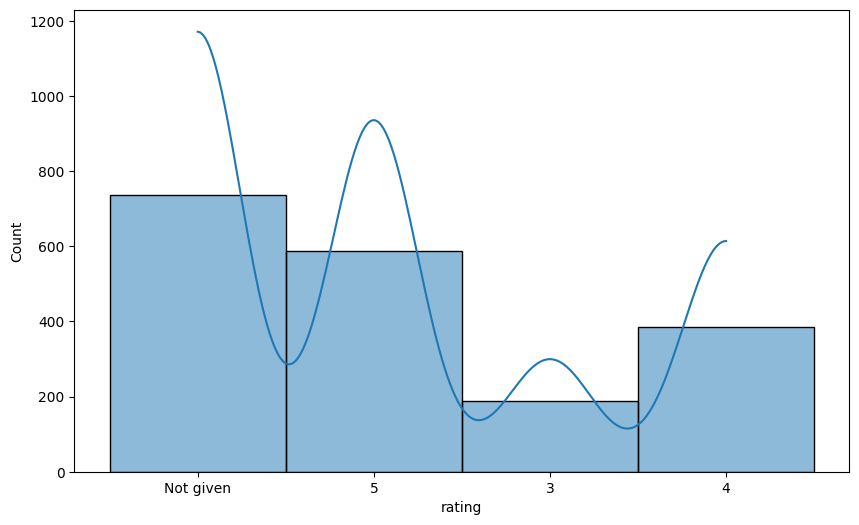

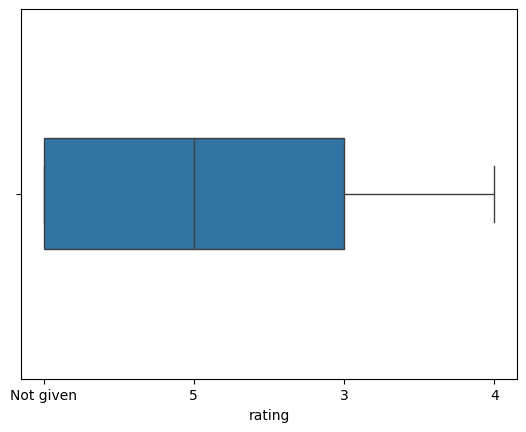

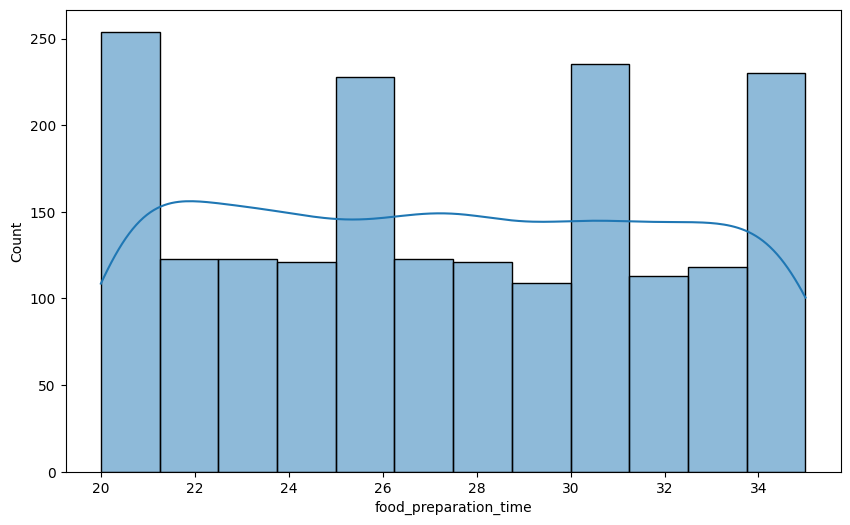

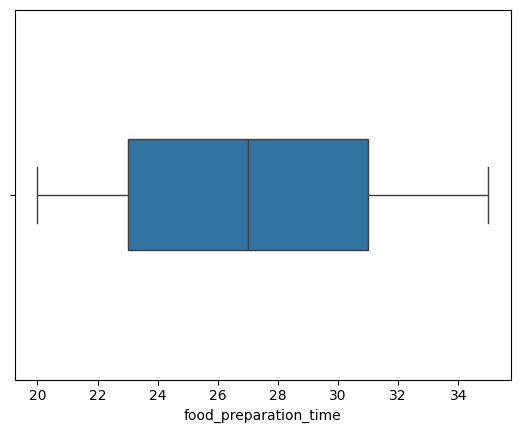

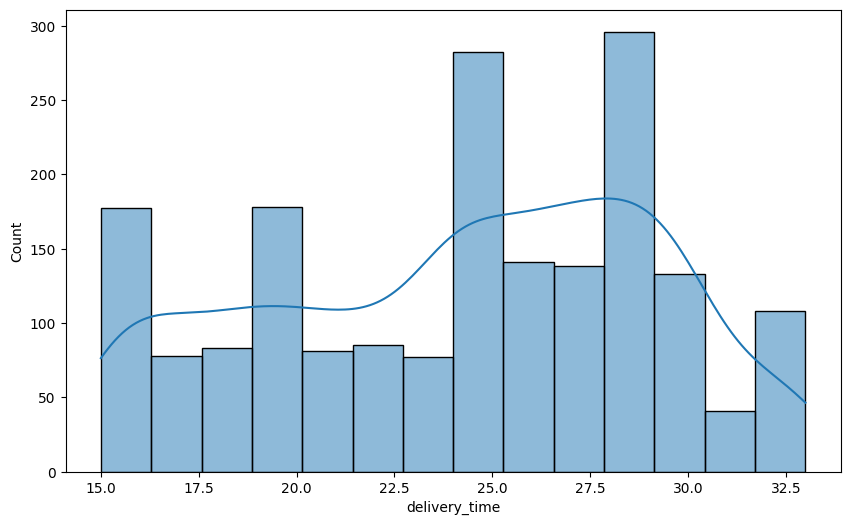

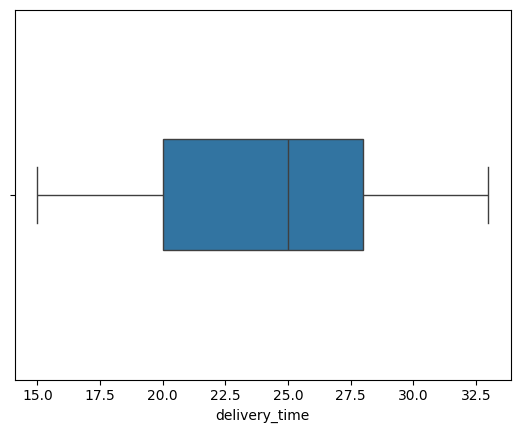

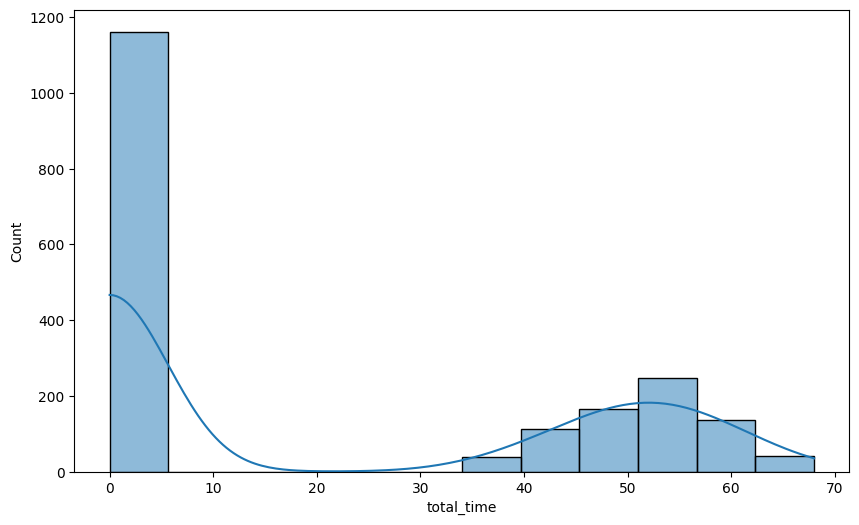

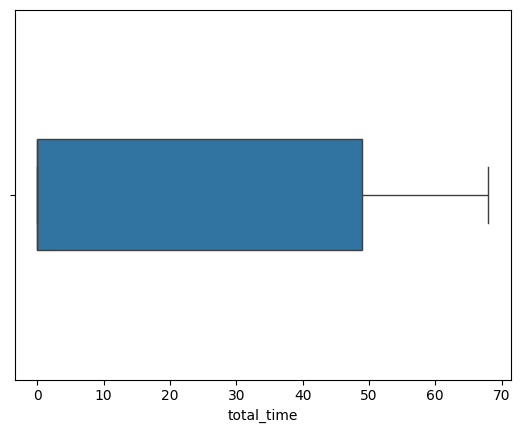

Number of unique restaurant names: 178
Number of unique cuisine types: 14
Number of unique day of the week: 2
Day of the week counts: Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
OBSERVATION: it is not M,T,W... but just two values to that will limit our ability to analyze specific days later


<ipython-input-12-cb676c6d284b>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_the_week', order=df['day_of_the_week'].value_counts().index, palette='viridis')


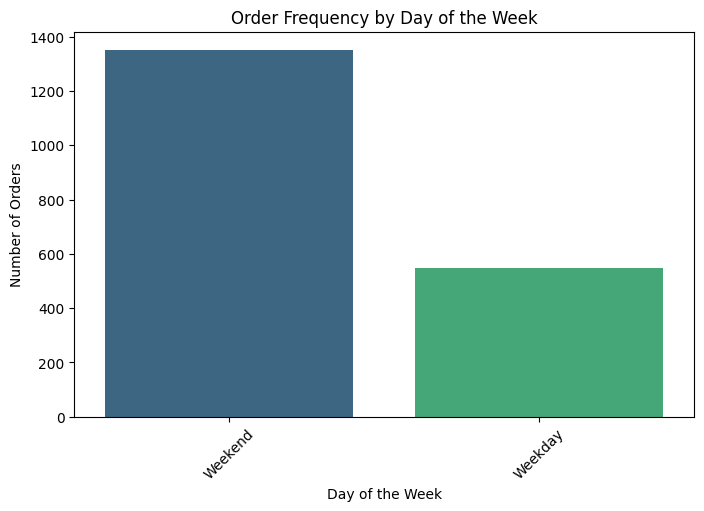

<ipython-input-12-cb676c6d284b>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')


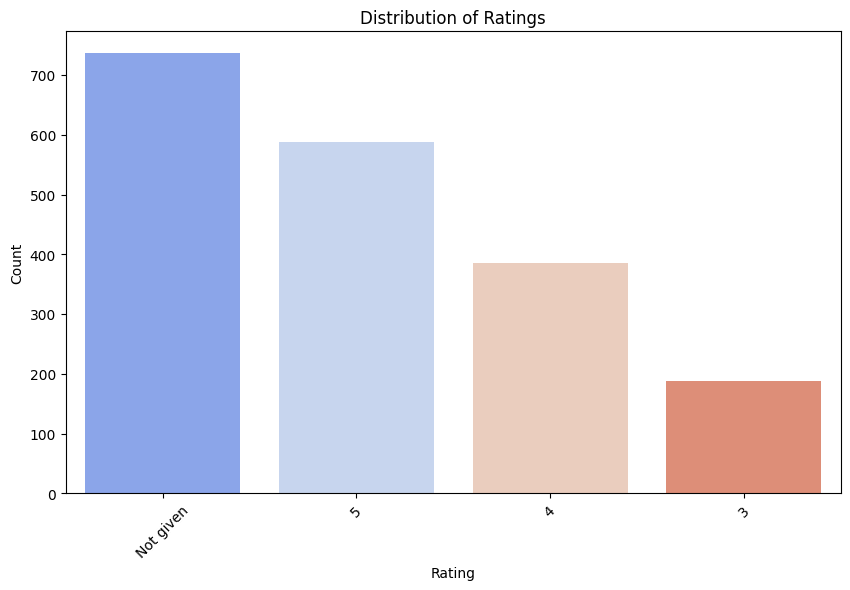

<ipython-input-12-cb676c6d284b>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


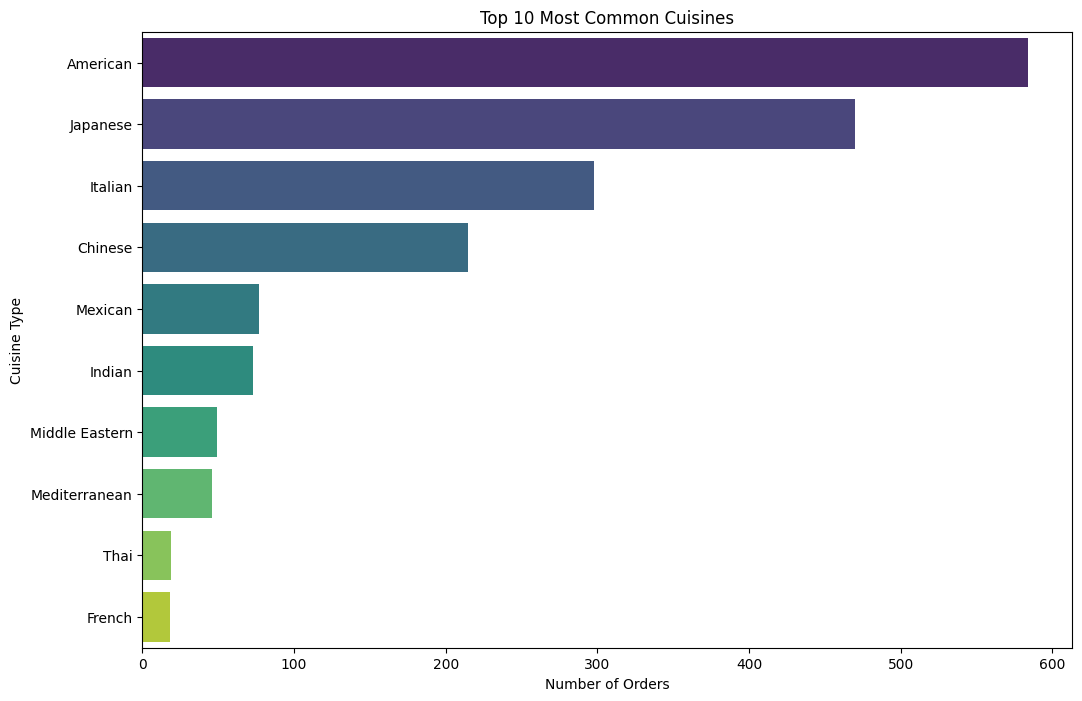

In [12]:
# First check to see if there are any duplicate identity (id) columns

# Count the total number of order_id values and subtract the number of unique order_id values to find duplicates
total_order_ids = df['order_id'].count()
unique_order_ids = df['order_id'].nunique()
duplicate_order_ids_count = total_order_ids - unique_order_ids

print(f"Number of duplicate order_ids: {duplicate_order_ids_count}")

# Now to customer rows
# Duplicate customers are exepected, check how many unique customers there are to be sure there are not too few or too many (i.e. every one) unique customers
unique_customer_ids = df['customer_id'].nunique()
print(f"Number of unique customers: {unique_customer_ids} out of {total_order_ids} total customer-orders")

#non-id numeric columns
# Create a combined histogram and box plot for each non-ID column
excluded_cols = ["order_id", "customer_id", "restaurant_name"]
cols = [col for col in df.columns if col not in excluded_cols]

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.show()
    sns.boxplot(data=df, x=col, width=0.3)
    plt.show()

#Now the categorical/text columns
#How many unique:
unique_restaurant_names = df['restaurant_name'].nunique()
print(f"Number of unique restaurant names: {unique_restaurant_names}")
unique_cuisine_type = df['cuisine_type'].nunique()
print(f"Number of unique cuisine types: {unique_cuisine_type}")

#let's look at day of week col.
unique_day_of_week = df['day_of_the_week'].nunique()
print(f"Number of unique day of the week: {unique_day_of_week}")
day_of_week_counts = df['day_of_the_week'].value_counts()
print(f"Day of the week counts: {day_of_week_counts}")
print("OBSERVATION: it is not M,T,W... but just two values to that will limit our ability to analyze specific days later")
# Countplot for 'day_of_the_week' to visualize the order frequency per day
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='day_of_the_week', order=df['day_of_the_week'].value_counts().index, palette='viridis')
plt.title('Order Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# rating we already did univariate analysis above but let's look at the distribution
# Countplot for 'rating' to see the distribution of ratings, including "Not given"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar plot for the top 10 most common 'cuisine_type'
# Find the top 10 most common cuisines
top_cuisines = df['cuisine_type'].value_counts().head(10)

# Generate a bar plot for the top 10 most common cuisines
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.show()






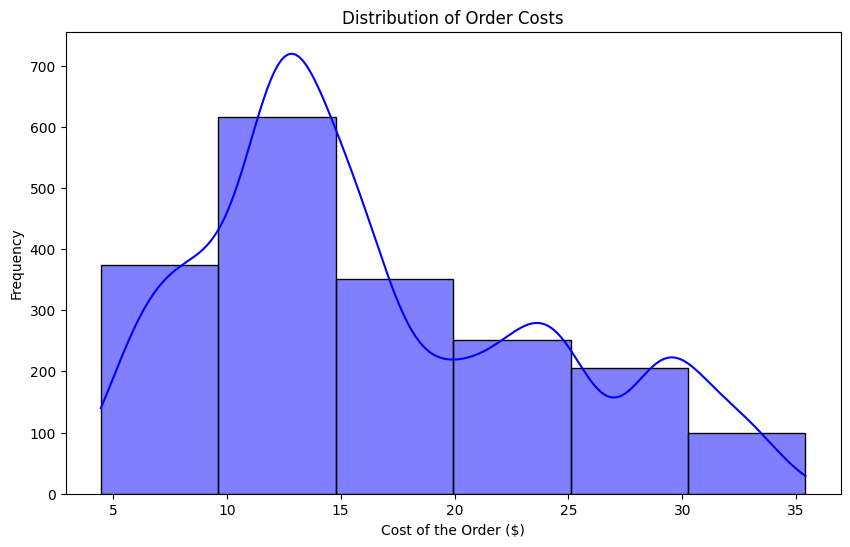

<ipython-input-15-8b44b0e7010f>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cost_of_the_order'], shade=True, color="orange")


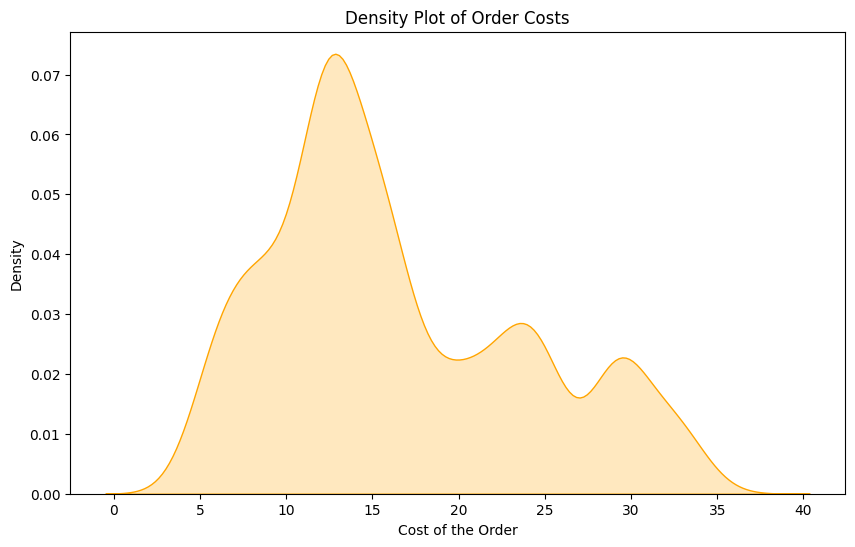

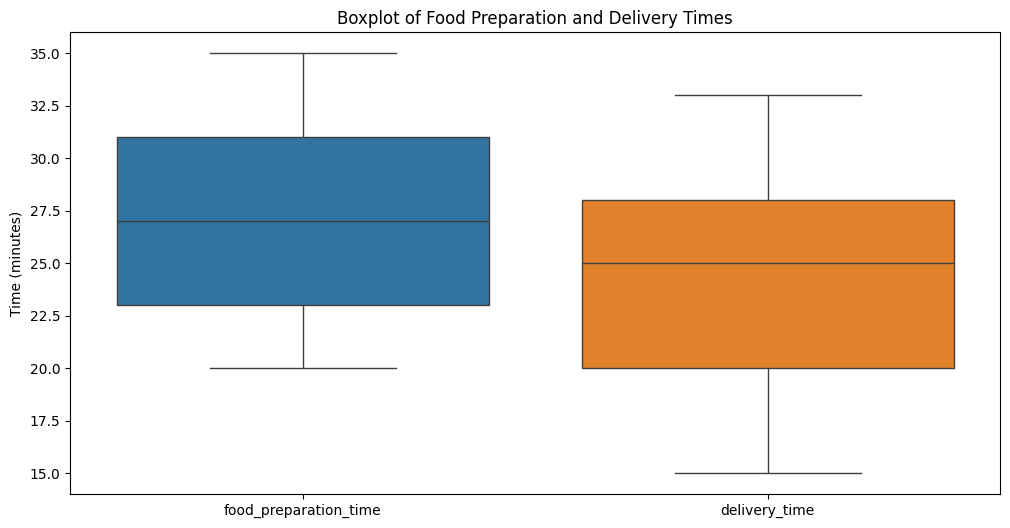

In [15]:
#now for the numeric columns in more detail
#cost_of_the_order
#food_preparation_time
#delivery_time
#total_time

# Histogram for 'cost_of_the_order' to see the distribution of order costs
plt.figure(figsize=(10, 6))
sns.histplot(df['cost_of_the_order'], kde=True, color='blue', binwidth=5)
plt.title('Distribution of Order Costs')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Frequency')
plt.show()

# Density Plot for 'cost_of_the_order'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['cost_of_the_order'], shade=True, color="orange")
plt.title('Density Plot of Order Costs')
plt.xlabel('Cost of the Order')
plt.ylabel('Density')
plt.show()

# Boxplot for 'food_preparation_time' and 'delivery_time' to view their spread and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['food_preparation_time', 'delivery_time']], orient="v")
plt.title('Boxplot of Food Preparation and Delivery Times')
plt.ylabel('Time (minutes)')
plt.show()





**OBSERVATIONS: **
1. Cost of the Order: Relatively right skewed. The average cost of an order is approximately $16.50.
2. Order Frequency by Day: Orders are significantly higher on weekends (1351 orders) compared to weekdays (547 orders), indicating a potential opportunity to boost revenue during weekends.
3. There are no duplicate order_id values in the dataset, indicating each order is uniquely identified.
4. There are 1200 unique customers out of the total customer-orders, suggesting repeat orders from some customers.
5. The dataset contains 178 unique restaurant names, indicating a wide variety of food service providers.
6. There are 14 unique cuisine types, offering a diverse range of food options. Cuisine Popularity: American cuisine is the most ordered (584 orders), followed by Japanese (470), and Italian (298). This suggests a preference for these cuisines among customers.
7. Interestingly, the day_of_the_week column only contains 2 unique values: "Weekend" and "Weekday", with 1351 orders placed on the weekend and 547 orders placed on weekdays. This simplification limits the ability to analyze trends for specific days of the week but clearly shows a higher preference for ordering during the weekend.
8. Ratings Distribution: A large number of orders (736) have no given rating, but among rated orders, the majority have a high rating (5 stars: 588 orders), suggesting customer satisfaction with the service.
9.Food prep time is relatively uniformly distributed.
10. Delivery and Preparation Times: The average delivery time is around 24 minutes, and the average food preparation time is approximately 27 minutes, indicating efficient operation times. Delivery time is left skewed
11. In general the data set appears to be robust and usable with no duplicated or missing data







### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

<ipython-input-16-d93ddb2b8bd1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=restaurant_order_counts.values, y=restaurant_order_counts.index, palette='coolwarm')


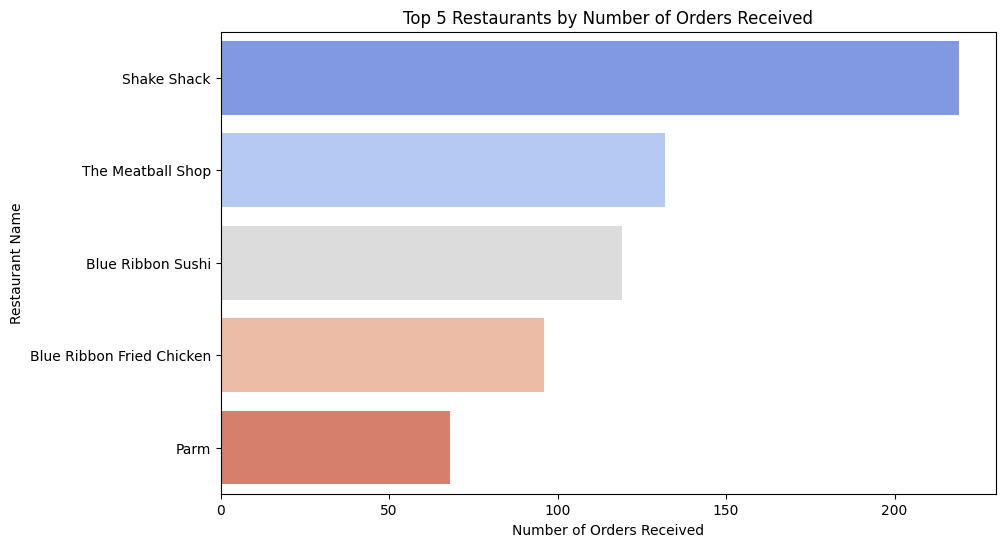

In [16]:
# Calculate the number of orders received by each restaurant
restaurant_order_counts = df['restaurant_name'].value_counts().head(5)

# Generate a bar plot for the top 5 restaurants by number of orders received
plt.figure(figsize=(10, 6))
sns.barplot(x=restaurant_order_counts.values, y=restaurant_order_counts.index, palette='coolwarm')
plt.title('Top 5 Restaurants by Number of Orders Received')
plt.xlabel('Number of Orders Received')
plt.ylabel('Restaurant Name')
plt.show()

#### Observations: In order: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [17]:
# Filter the dataset for orders placed on weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Calculate the most popular cuisine on weekends based on the number of orders
popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().head(1)

print(popular_cuisine_weekend)

American    415
Name: cuisine_type, dtype: int64


#### Observations: American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# Calculate the percentage of orders that cost more than 20 dollars
percentage_over_20 = (df['cost_of_the_order'] > 20).astype(int).mean() * 100

print(f"Percentage of orders costing more than 20 dollars: {percentage_over_20:.2f}%")



Percentage of orders costing more than 20 dollars: 29.24%


#### Observations: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
# Calculate the mean of the order delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f"Mean Order Delivery Time: {mean_delivery_time:.2f} minutes")

Mean Order Delivery Time: 24.16 minutes


#### Observations: 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [20]:
# Determine the top 3 most frequent customers and the number of orders they placed
top_customers = df['customer_id'].value_counts().head(3)

print(top_customers)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
customers: 52832 (13 orders), 47440 (10 orders), 83287 (9 orders)


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


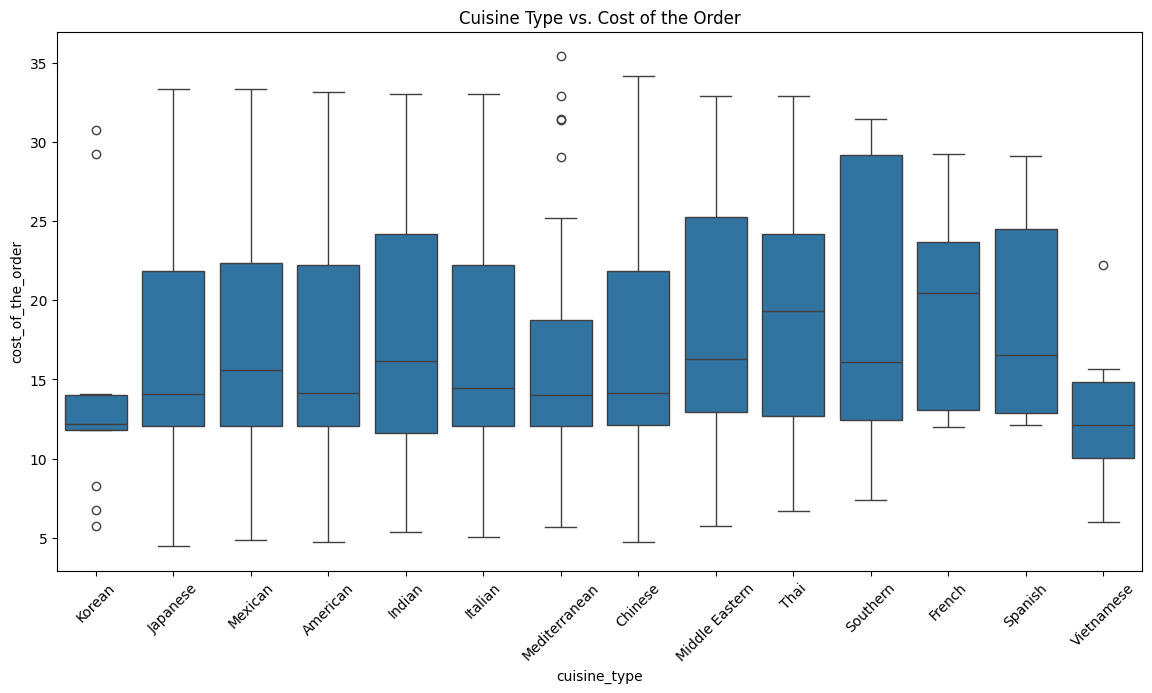

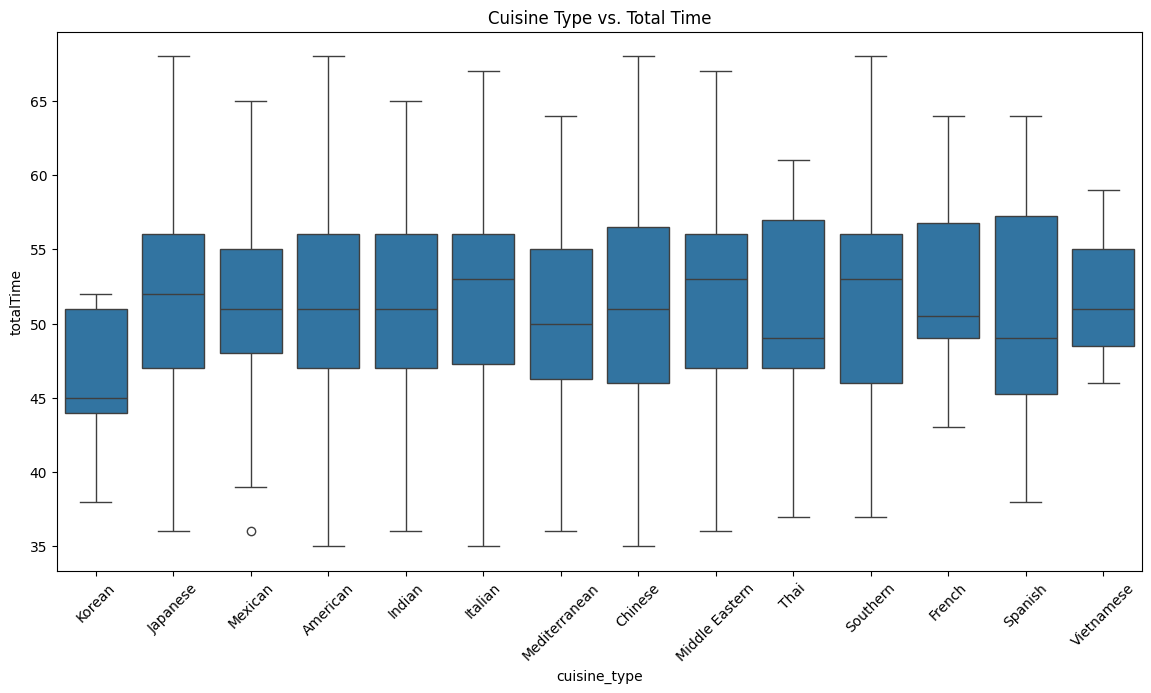

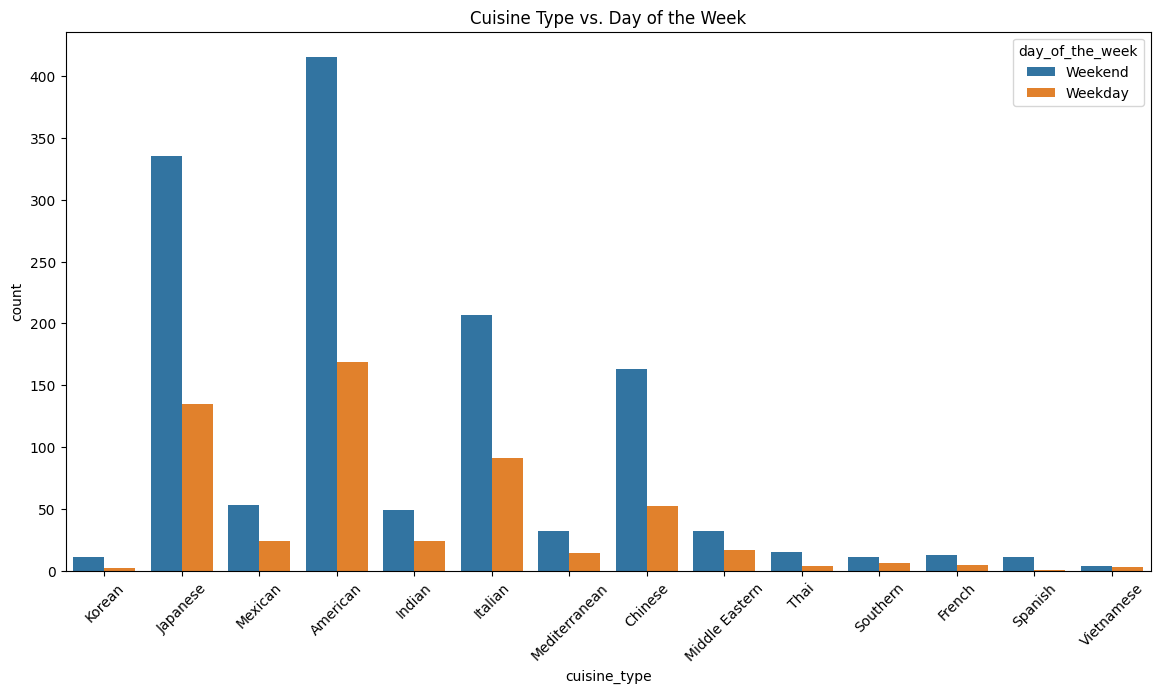

<ipython-input-21-19da7ed3c660>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_rating['rating'] = pd.to_numeric(df_filtered_rating['rating'])


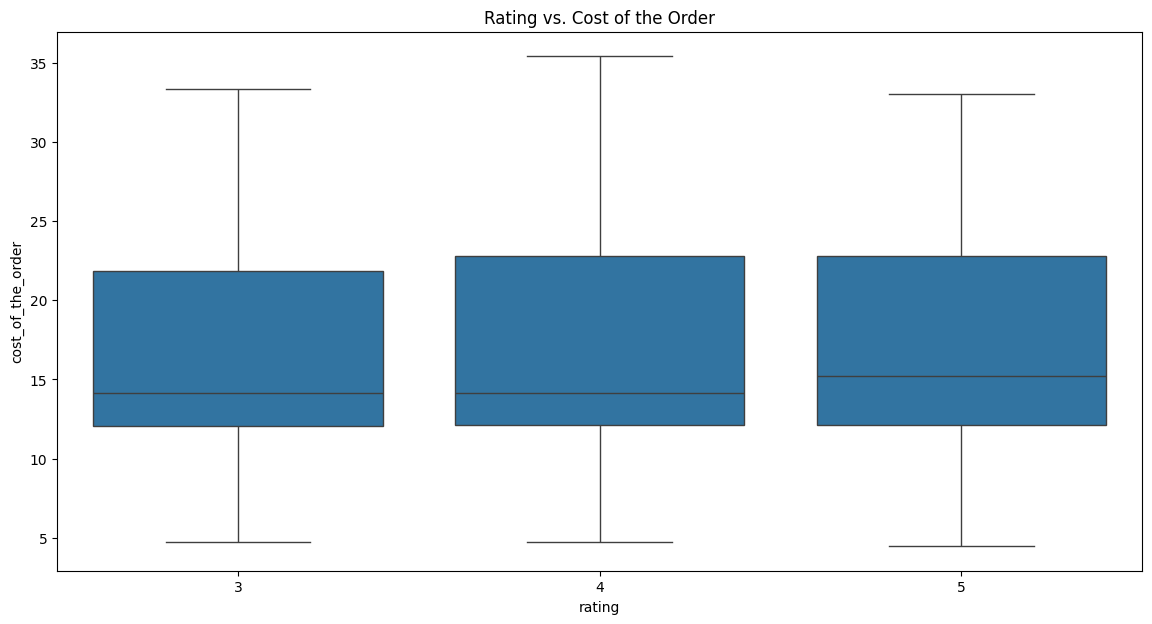

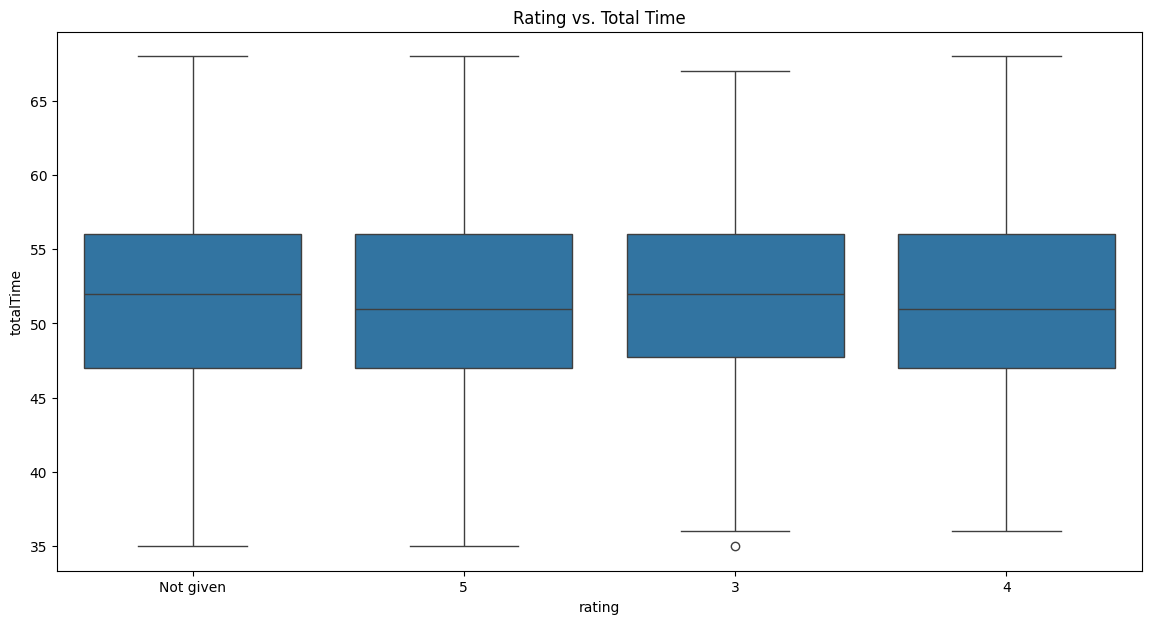

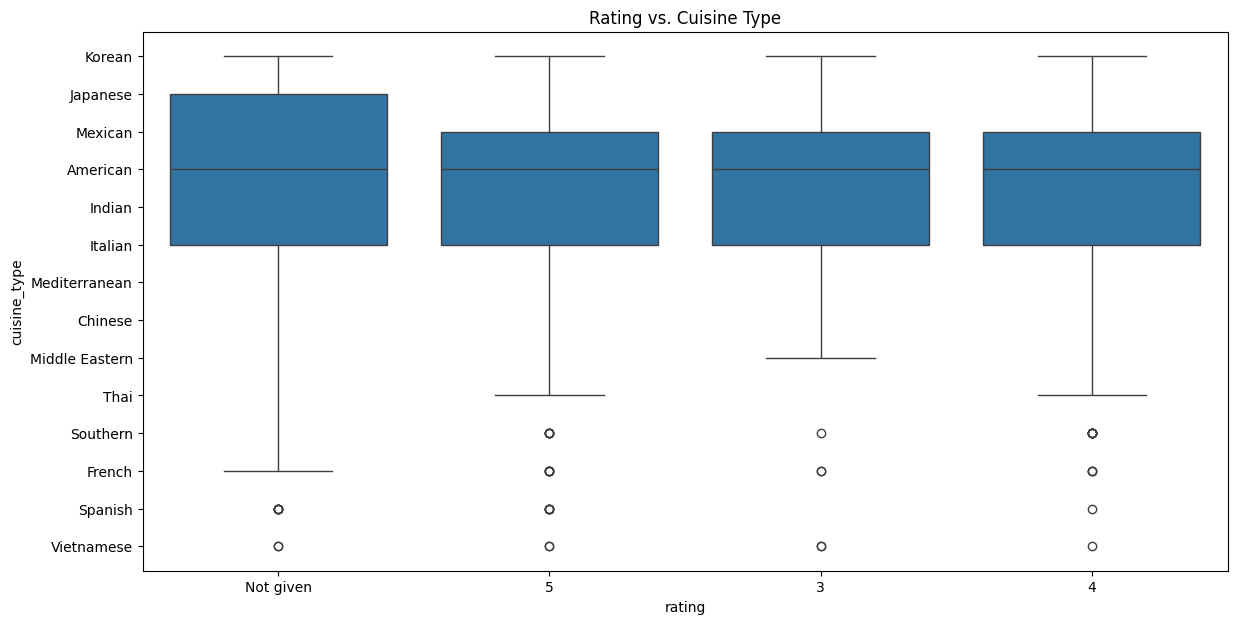

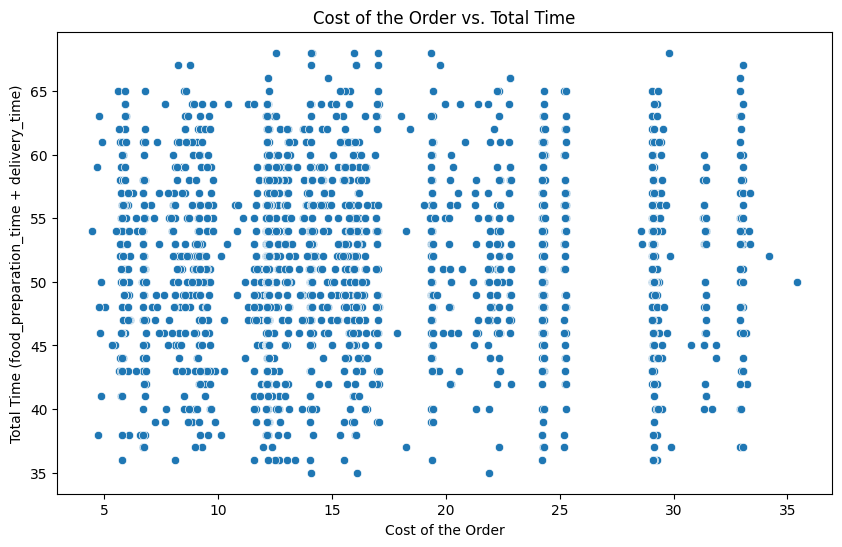

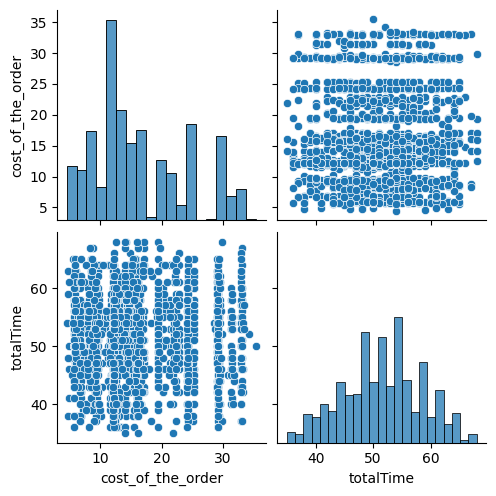

<ipython-input-21-19da7ed3c660>:71: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


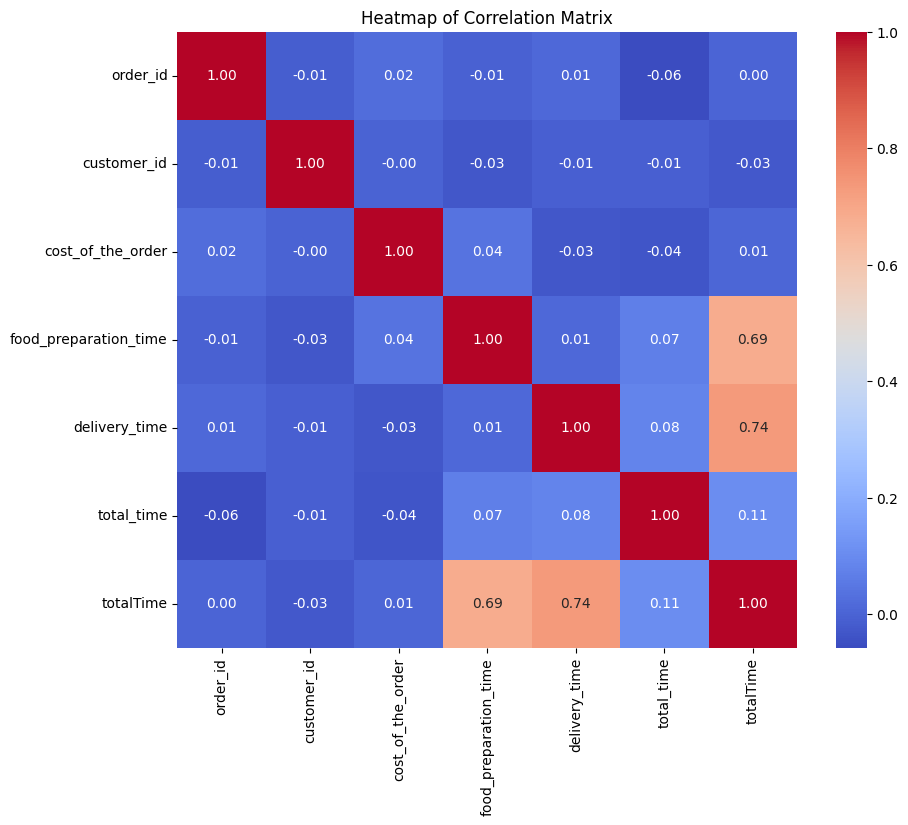

In [21]:

# Add totalTime column as the sum of food_preparation_time and delivery_time
df['totalTime'] = df['food_preparation_time'] + df['delivery_time']

# Let's look at cuisine type first

# Cuisine Type vs. Cost of the Order
plt.figure(figsize=(14, 7))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.title('Cuisine Type vs. Cost of the Order')
plt.show()

# Cuisine Type vs. Total Time (food_preparation_time + delivery_time)
plt.figure(figsize=(14, 7))
sns.boxplot(x='cuisine_type', y='totalTime', data=df)
plt.xticks(rotation=45)
plt.title('Cuisine Type vs. Total Time')
plt.show()

# Cuisine Type vs. Day of the Week
plt.figure(figsize=(14, 7))
sns.countplot(x='cuisine_type', hue='day_of_the_week', data=df)
plt.xticks(rotation=45)
plt.title('Cuisine Type vs. Day of the Week')
plt.show()

# Now for ratings, we will filter out the "Not given" ratings as they provide no value
# Filter out rows where rating is 'Not given'
df_filtered_rating = df[df['rating'] != 'Not given']
df_filtered_rating['rating'] = pd.to_numeric(df_filtered_rating['rating'])


plt.figure(figsize=(14, 7))
sns.boxplot(x='rating', y='cost_of_the_order', data=df_filtered_rating)
plt.title('Rating vs. Cost of the Order')
plt.show()


# Rating vs. Total Time (food_preparation_time + delivery_time)
plt.figure(figsize=(14, 7))
sns.boxplot(x='rating', y='totalTime', data=df)
plt.title('Rating vs. Total Time')
plt.show()

# Rating vs. Cuisine Type
plt.figure(figsize=(14, 7))
sns.boxplot(x='rating', y='cuisine_type', data=df)
plt.title('Rating vs. Cuisine Type')
plt.show()


# Let's look at cost vs. total time
# Plot: Cost of the Order vs. Total Time (food_preparation_time + delivery_time)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost_of_the_order', y='totalTime', data=df)
plt.title('Cost of the Order vs. Total Time')
plt.xlabel('Cost of the Order')
plt.ylabel('Total Time (food_preparation_time + delivery_time)')
plt.show()

# another view
# pairplot looking for correlation b/t time and cost
columns_of_interest = ['cost_of_the_order', 'totalTime']
# Create the pair plot
sns.pairplot(df[columns_of_interest])
# Display the plot
plt.show()

# check out correlations of numeric columns
# heatmap
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()




**OBSERVATIONS:**
1. There's a very weak positive correlation between cost_of_the_order and food_preparation_time (corr: 0.04), suggesting minimal influence of preparation time on the cost.
2. The correlation between cost_of_the_order and delivery_time is slightly negative (corr: -0.03), indicating that longer delivery times do not necessarily lead to higher costs.
3. A weak positive correlation exists between cost_of_the_order and rating_numeric (corr: 0.03), hinting that higher spending might slightly correlate with better customer ratings.
4. Average Cost of the Order by Cuisine: French cuisine has the highest average order cost then Southern and Thai. This indicates that focusing on these cuisines could potentially increase revenue. On the lower end, Korean and Vietnamese cuisines have the lowest average order costs, suggesting less revenue potential from these cuisines.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [22]:
# Note - I used the Low Code notebook as a guide on this one in terms of the steps that need to be done

# Filter to include only rows with non-"Not given" ratings
df_filtered_ratings = df[df['rating'] != 'Not given']

# Convert 'rating' column to numeric type
df_filtered_ratings['rating'] = pd.to_numeric(df_filtered_ratings['rating'])

# Group by restaurant name and calculate rating count for each restaurant
restaurant_rating_counts = df_filtered_ratings['restaurant_name'].value_counts()

# Filter to include only restaurants with more than 50 rating counts
popular_restaurants = restaurant_rating_counts[restaurant_rating_counts > 50].index

# Filter the original dataframe to include only rows corresponding to these restaurants
filtered_df = df_filtered_ratings[df_filtered_ratings['restaurant_name'].isin(popular_restaurants)]

# Group by restaurant name and calculate mean rating for each restaurant
restaurant_avg_rating = filtered_df.groupby('restaurant_name')['rating'].mean()

# Filter to include only restaurants with average rating > 4
filtered_restaurants = restaurant_avg_rating[restaurant_avg_rating > 4]

# Filter the original dataframe to include only rows corresponding to these restaurants
final_filtered_df = df.loc[df['restaurant_name'].isin(filtered_restaurants.index)]

# Display the resulting filtered dataframe
print(final_filtered_df)






      order_id  customer_id            restaurant_name cuisine_type  \
3      1477334       106968  Blue Ribbon Fried Chicken     American   
6      1477894       157711          The Meatball Shop      Italian   
12     1476966       129969  Blue Ribbon Fried Chicken     American   
15     1477414        66222                Shake Shack     American   
19     1477354        67487          Blue Ribbon Sushi     Japanese   
...        ...          ...                        ...          ...   
1887   1476873       237616                Shake Shack     American   
1888   1477353       106324          The Meatball Shop      Italian   
1891   1476981       138586                Shake Shack     American   
1895   1477819        35309          Blue Ribbon Sushi     Japanese   
1897   1478056       120353          Blue Ribbon Sushi     Japanese   

      cost_of_the_order day_of_the_week     rating  food_preparation_time  \
3                 29.20         Weekend          3                    

<ipython-input-22-94d4cd37bb3b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_ratings['rating'] = pd.to_numeric(df_filtered_ratings['rating'])


#### Observations:
As shown above


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [23]:
# let's reload the origianl df to be sure we have a clean df
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Data Viz - Project 1/foodhub_order.csv')
# returns the first 5 rows
#df.head()

# Define a function to calculate commission based on order cost
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25  # 25% commission for orders more than $20
    elif cost > 5:
        return cost * 0.15  # 15% commission for orders more than $5 and up to $20
    else:
        return 0  # No commission for orders $5 or less

# Apply the function to each order to calculate its commission
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Sum up all the commissions to find total revenue generated by the company
total_revenue = df['commission'].sum()

total_revenue


6166.303

#### Observations: net revenue is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [24]:
# Calculate total time as the sum of food preparation time and delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes
percentage_over_60_minutes = (df['total_time'] > 60).mean() * 100

# Print the result
print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60_minutes:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:10.54% of the orders take more than 60 minutes to get delivered from the time the order was placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [25]:
# Group the data by 'day_of_the_week' and calculate the mean delivery time for each group
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

# Display the result
print(mean_delivery_time_by_day)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations: delivery time mean for weekdays is 28.34 minutes vs. weekends which is 22.47 minutes. This may be due to a greater volume of customers that live closer to the resturants ordering food on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. Weekends have a higher order volume and slightly higher average costs so focusing marketing and promotional efforts on these days could boost revenue.
2. Prioritizing and promoting cuisines with higher average order costs, such as French, Southern, and Thai, may increase average revenue per order.
3. Given the slight correlation between spending and ratings, maintaining high customer satisfaction could encourage higher spending.
4. The minimal correlations suggest that operational efficiencies in preparation and delivery times do not directly impact revenue; however, customer satisfaction related to these areas could indirectly influence spending.
5. Consider reviewing and possibly optimizing the menu offerings for cuisines like Korean and Vietnamese to increase their average order value.




### Recommendations:
1. Launch special promotions or limited-time offers during weekends to attract more orders with potentially higher value.
2. Use marketing campaigns to highlight cuisines with higher average costs, focusing on the quality and uniqueness of offerings.
3. Continuously monitor and enhance the customer experience, including food quality and delivery service, to maintain or improve satisfaction ratings.
4. Dive deeper into customer feedback, especially for cuisines with lower average costs, to identify opportunities for menu improvement.
5. While direct correlations are minimal, continue to optimize food preparation and delivery processes to ensure customer satisfaction, which could indirectly affect spending.



In [30]:
!jupyter nbconvert --to html ///content/PYF_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook ///content/PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1968974 bytes to /content/PYF_Project_LearnerNotebook_FullCode.html
